#HW 10 CLUSTERING BUSINESS

In [1]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

#NYC zip codes shape file is here
##http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [2]:
import pandas as pd
import zipfile 
import glob, os
import numpy as np
import pylab as pl
import json


%pylab inline

nyjason = json.load(open('nyc-zip-code-tabulation-areas-polygons.geojson'))

Populating the interactive namespace from numpy and matplotlib


In [3]:
nyc_zip = []
for d in nyjason['features']:
    nyc_zip.append(str(d['properties']["postalCode"]))

In [4]:
os.chdir(".")  ## change the current working directory to given path

fname = "zbp00totals.zip"
zf = zipfile.ZipFile(fname)
b = pd.read_csv(zf.open(fname.replace('.zip','.txt'))) ## convert zip to txt
b = b.rename(columns={'zip': 'ZIP', 'est': 'EST'})
b1 = b[['ZIP', 'EST']]
b1 = b1[(b1.ZIP.astype(str).isin(nyc_zip))]
b1['YEAR'] = 2000

for fname in glob.glob("*.zip"):  # finds all the pathnames matching a specified pattern according to the rules used by the Unix shell
    if fname == "zbp00totals.zip":
        continue
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df = df.rename(columns={'zip': 'ZIP', 'est': 'EST'})
    df = df[['ZIP', 'EST']]
    df = df[(df.ZIP.astype(str).isin(nyc_zip))]
    if int(fname[3:5]) > 93:
        df['YEAR'] = int('19' + fname[3:5])
    else:
        df['YEAR'] = int('20' + fname[3:5])
    b1 = b1.append(df, ignore_index=True)

In [5]:
##Creating a dataframe 
b2 = pd.DataFrame(np.nan,index=sorted(unique(b1.ZIP)),columns=range(1994,2014)) 

In [6]:
for z in b2.index:
    for y in b2.columns:
        est = b1[(b1.ZIP == int(z)) & (b1.YEAR == y)]
        if len(est) != 0:  ## checking for the 0 index error 
            b2.loc[z, y] = int(est.EST.values[0])

In [7]:
b2.head()  ## here we have the time series

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  \
10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084  7370  7312   
10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402  2551  2682   
10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704  3776  3867   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  1283  1260   
10005  1076  1109  1216  1227  1270  1242  1287  1249  1244  1200  1226  1214   

       2006  2007  2008  2009  2010  2011  2012  2013  
10001  7415  7549  7472  7305  7241  7227  7235  7273  
10002  2686  2685  2691  2775  2872  2912  2954  2988  
10003  3909  4049  4071  4099  4113  4159  4214  4277  
10004  1311  1370  1376  1379  1398  1404  1442  1479  
10005  1259  1273  1291  1274  1266  1301  1273  1296

In [8]:
# whitening the series
wb2 = b2.copy()
for i in range(len(b2)):
    wb2.iloc[i] = (wb2.iloc[i]-np.mean(wb2.iloc[i]))/np.std(wb2.iloc[i])

In [9]:
# checking the standard deviation and mean
print("STD = {0}".format(np.std(wb2.loc[10005])))
print("MEAN = {0:.2f}".format(np.mean(wb2.loc[10005])))

STD = 1.0
MEAN = -0.00


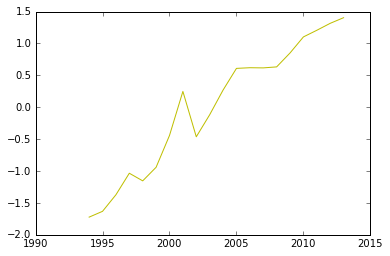

In [14]:
plt.plot(wb2.iloc[1].index, wb2.iloc[1], 'k', alpha=1, c='y')

In [16]:
wb2.head(3)

1994      1995      1996      1997      1998      1999      2000  \
10001 -1.831632 -1.173250 -1.269418 -0.685012  0.054742 -0.100607  0.520787   
10002 -1.722813 -1.631907 -1.372173 -1.034519 -1.153997 -0.941015 -0.442326   
10003 -1.872528 -1.457250 -1.319968 -0.914985 -0.523731 -0.489411 -0.407041   

           2001      2002      2003      2004      2005      2006      2007  \
10001 -0.433496 -0.781180 -1.202840  0.912857  0.483799  1.245746  2.237017   
10002  0.248565 -0.463105 -0.117659  0.269344  0.609595  0.619984  0.617387   
10003 -0.685038 -0.636989 -0.334968 -0.087861  0.224456  0.368602  0.849090   

           2008      2009      2010      2011      2012      2013  
10001  1.667406  0.432016 -0.041426 -0.144992 -0.085811  0.195295  
10002  0.632971  0.851147  1.103089  1.206982  1.316071  1.404380  
10003  0.924595  1.020693  1.068741  1.226616  1.415379  1.631598

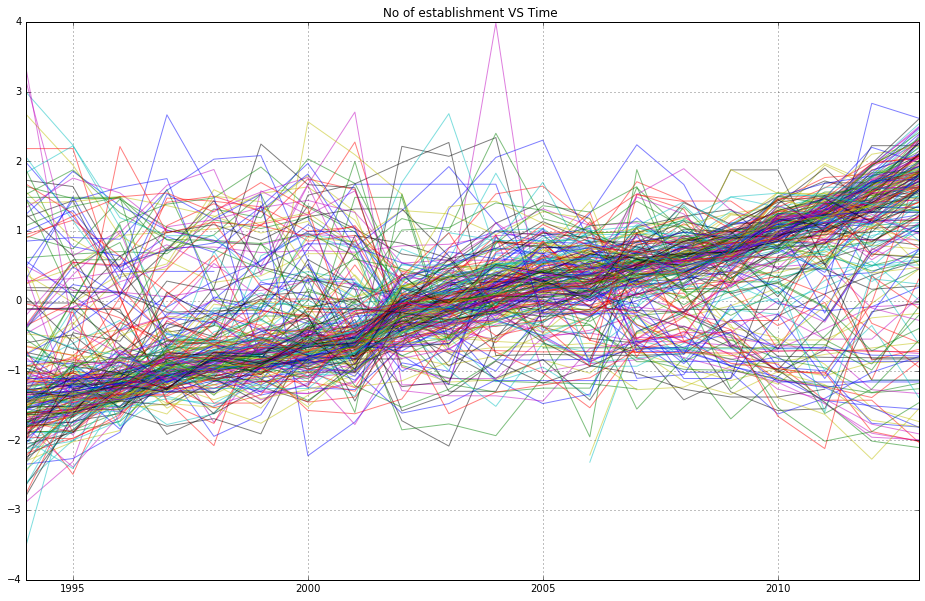

In [17]:
plt.figure(figsize=(16,10))
plt.xlim(1994,2013)
for i in range(len(wb2)-1):
    plt.plot(wb2.iloc[i].index, wb2.iloc[i], '-', alpha=0.5)
plt.title('No of establishment VS Time ')
plt.grid()

In [18]:
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from descartes import PolygonPatch

In [19]:
wb2 = wb2.dropna()

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


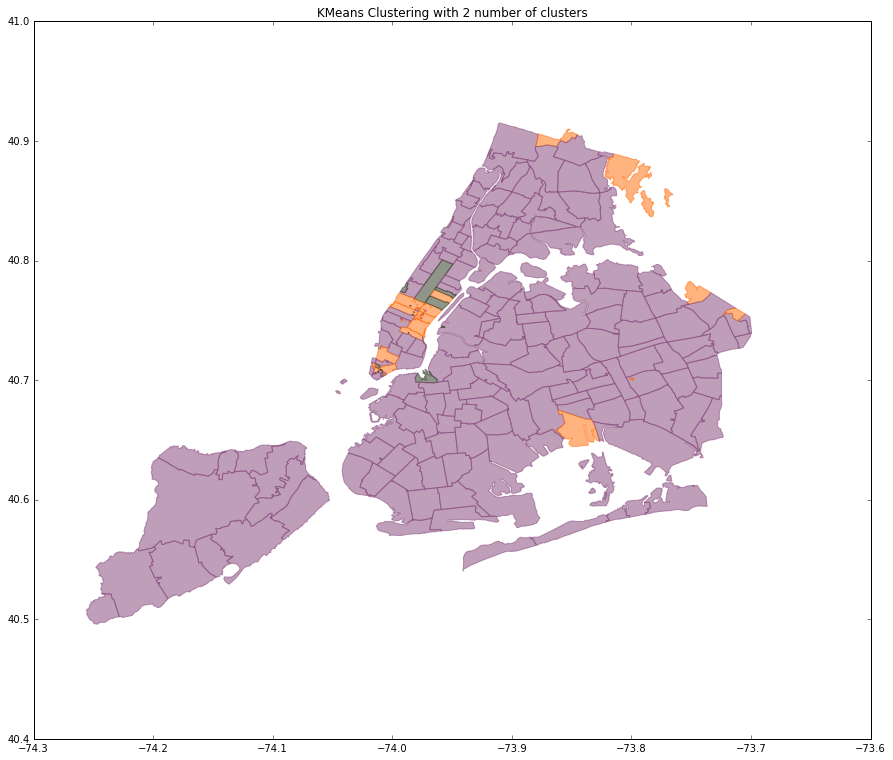

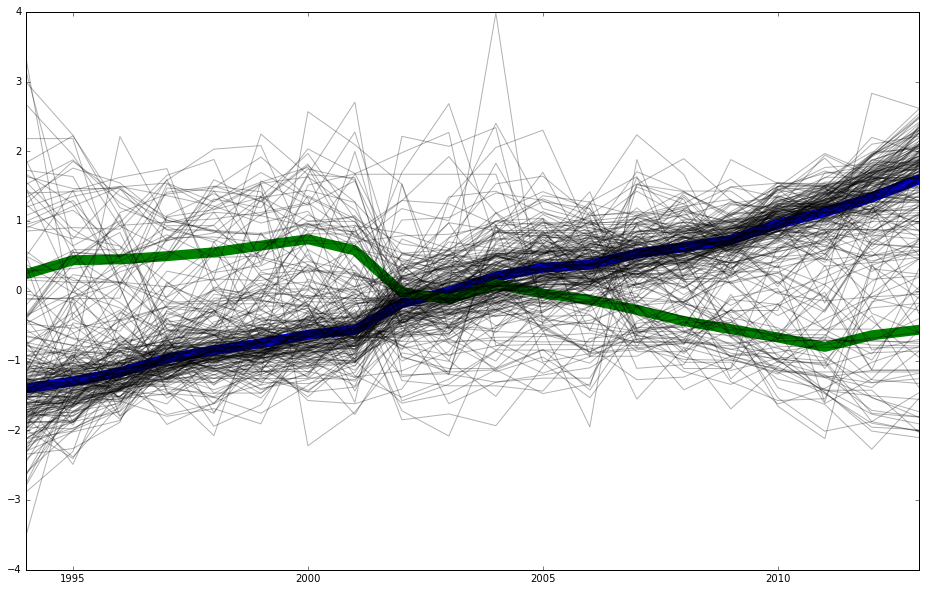

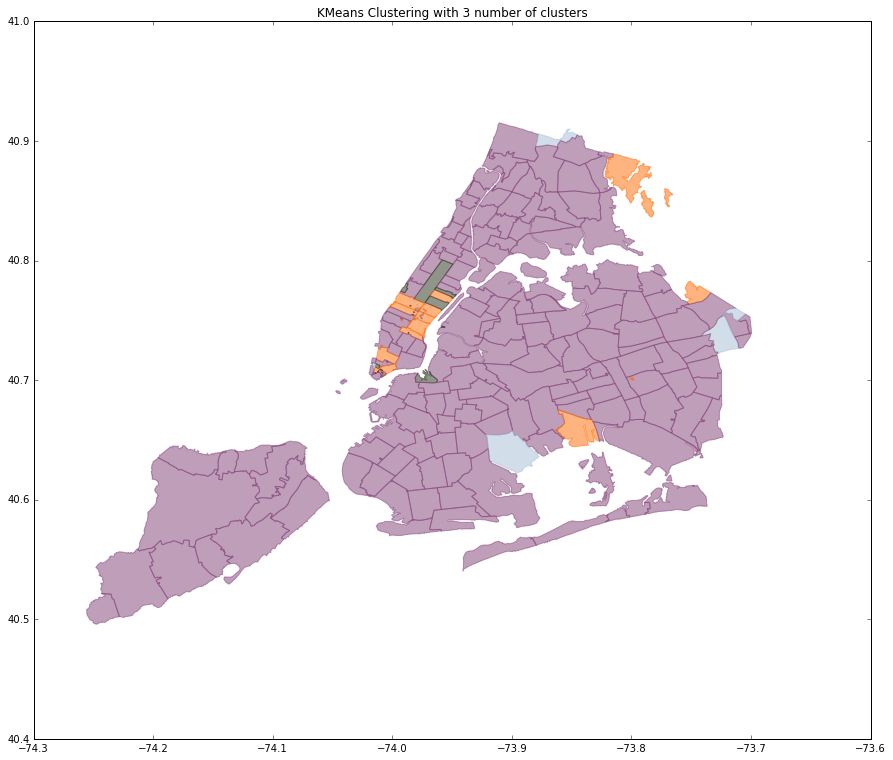

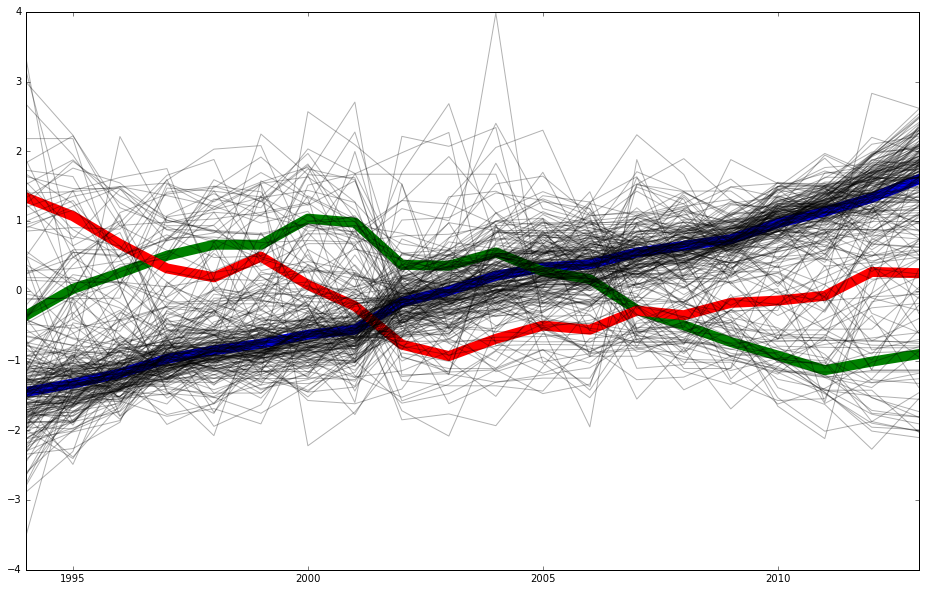

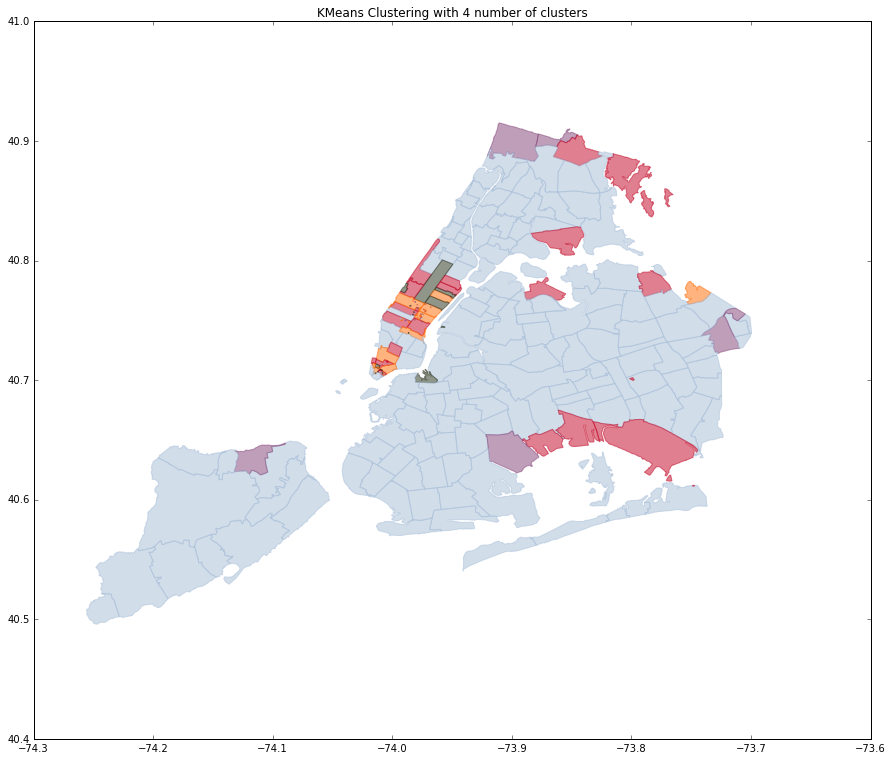

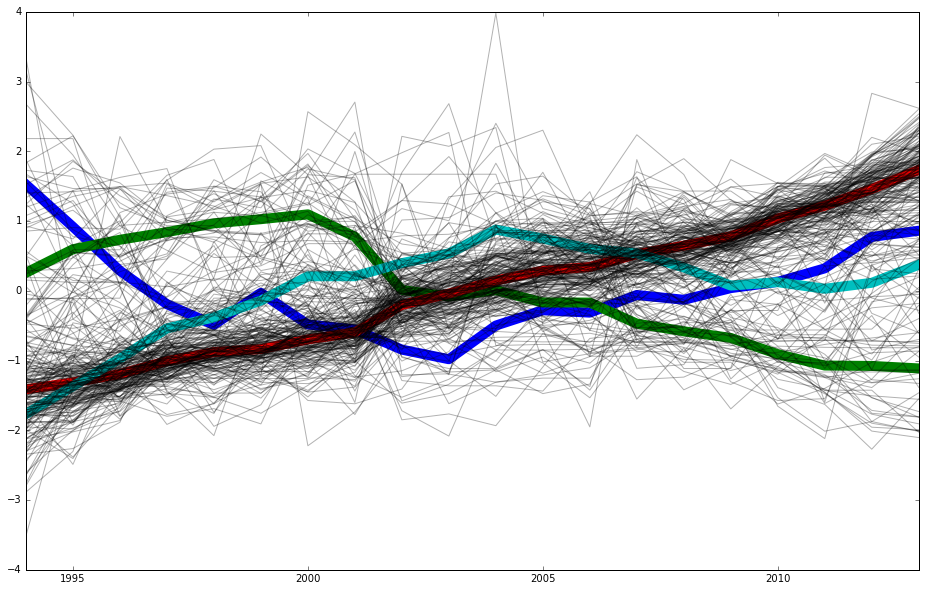

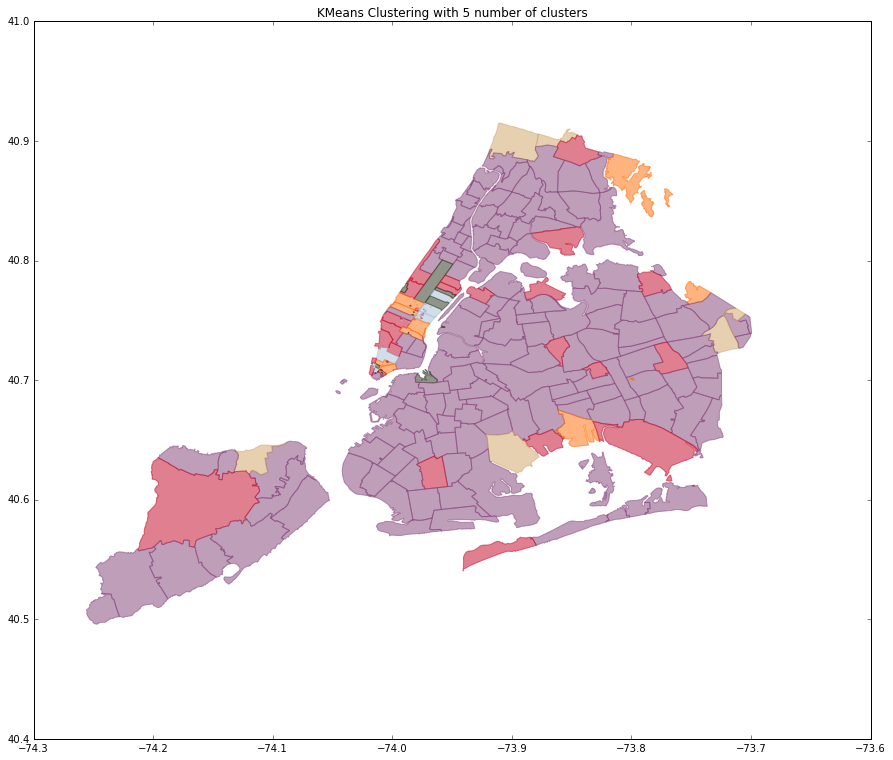

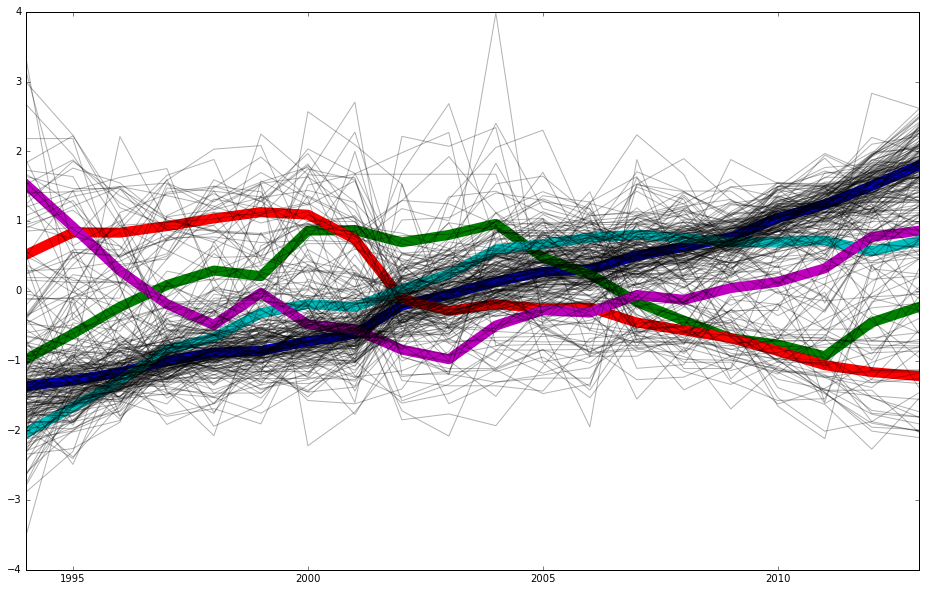

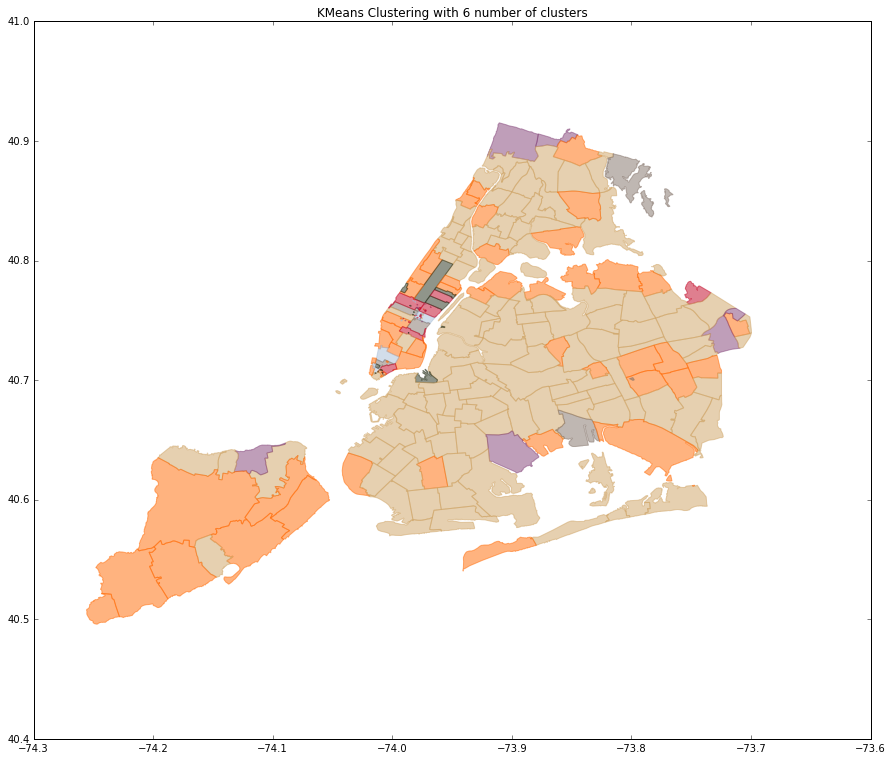

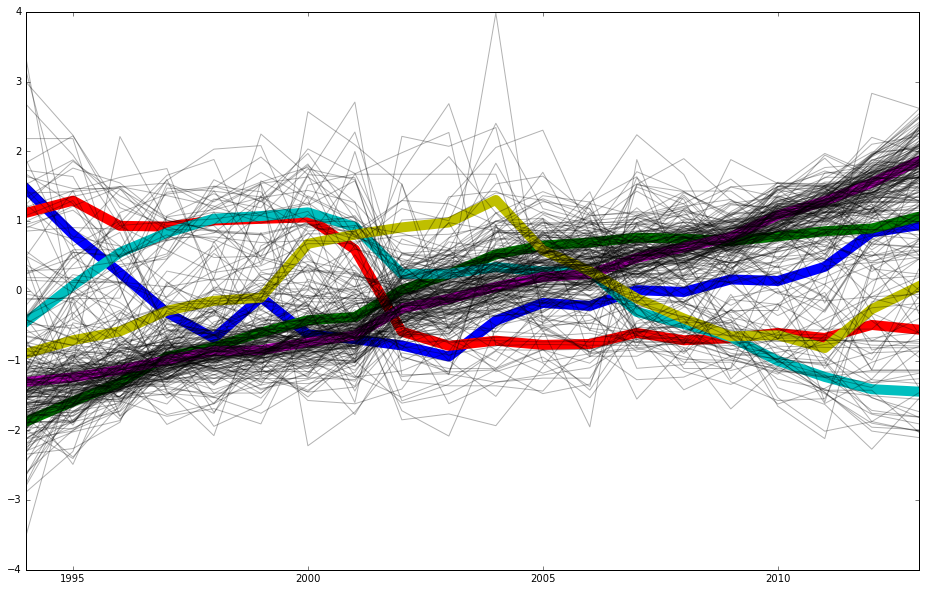

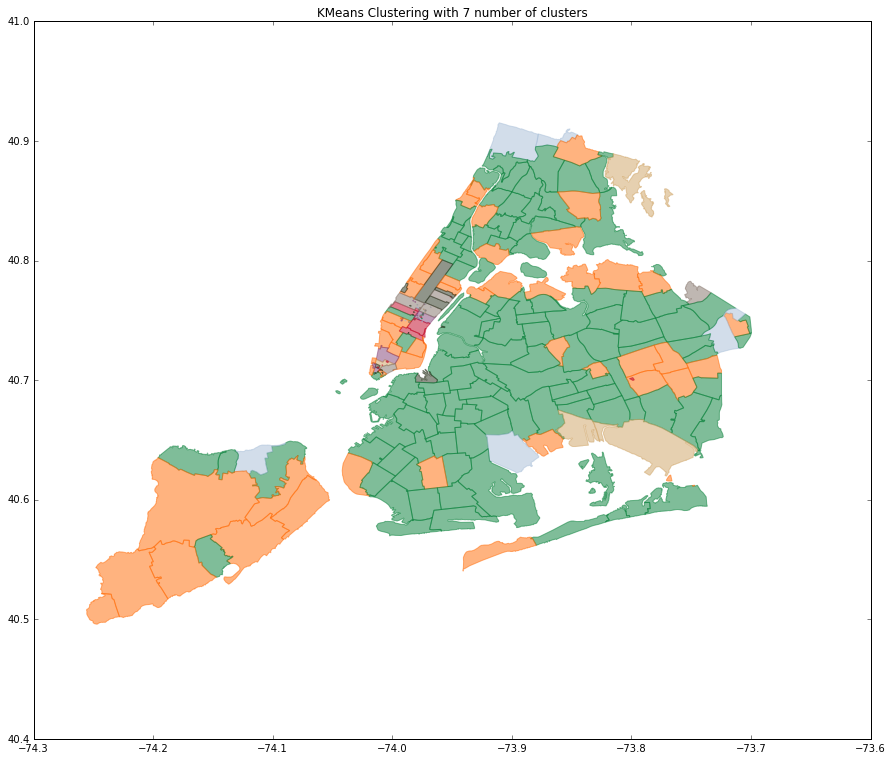

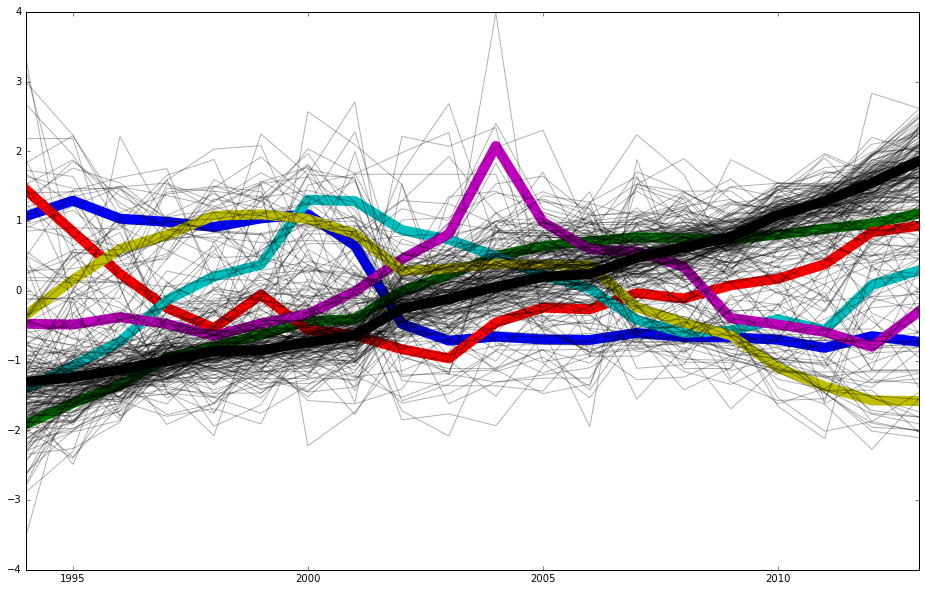

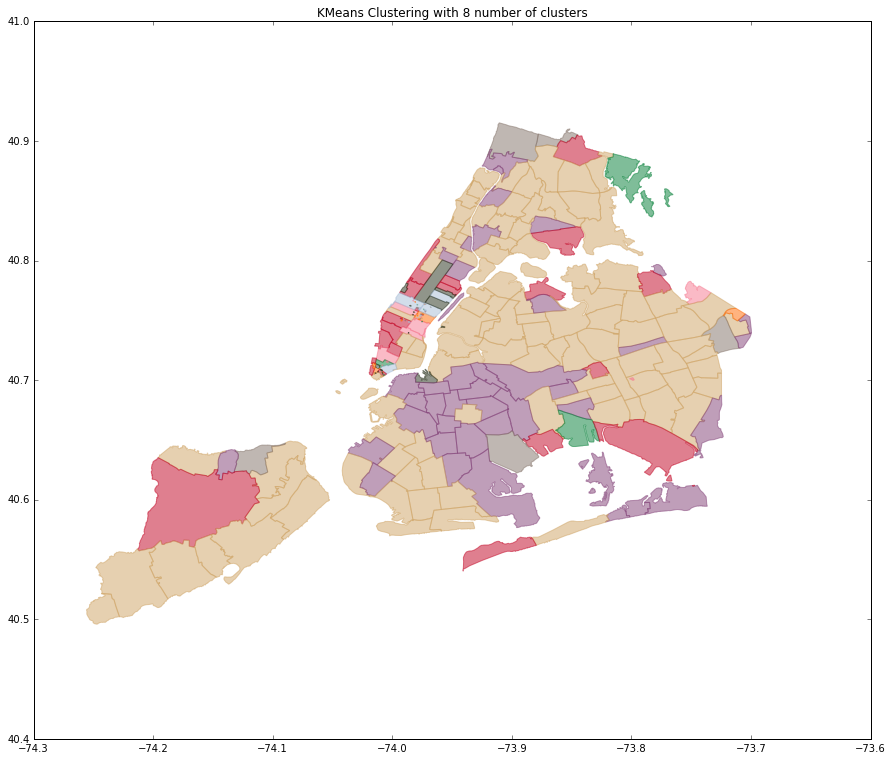

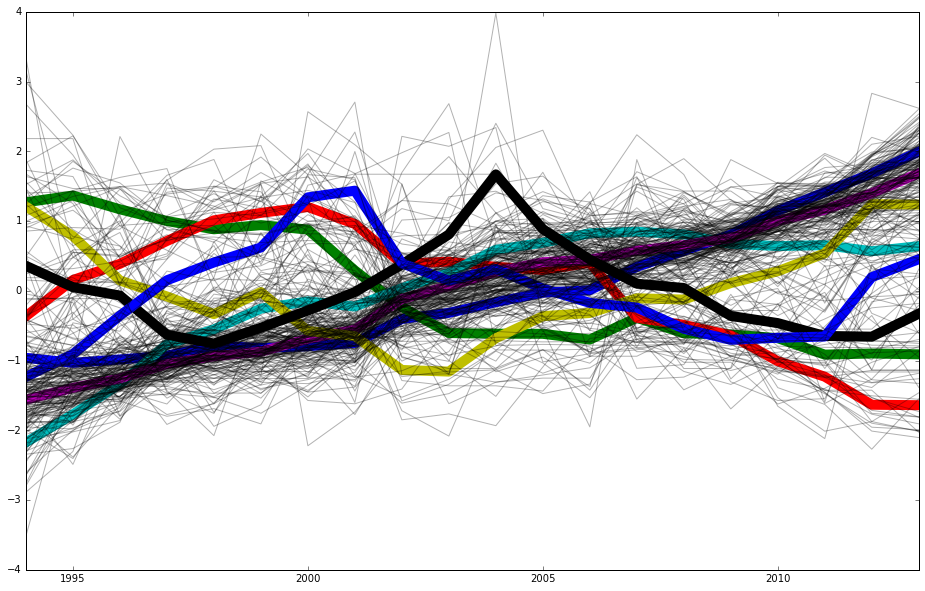

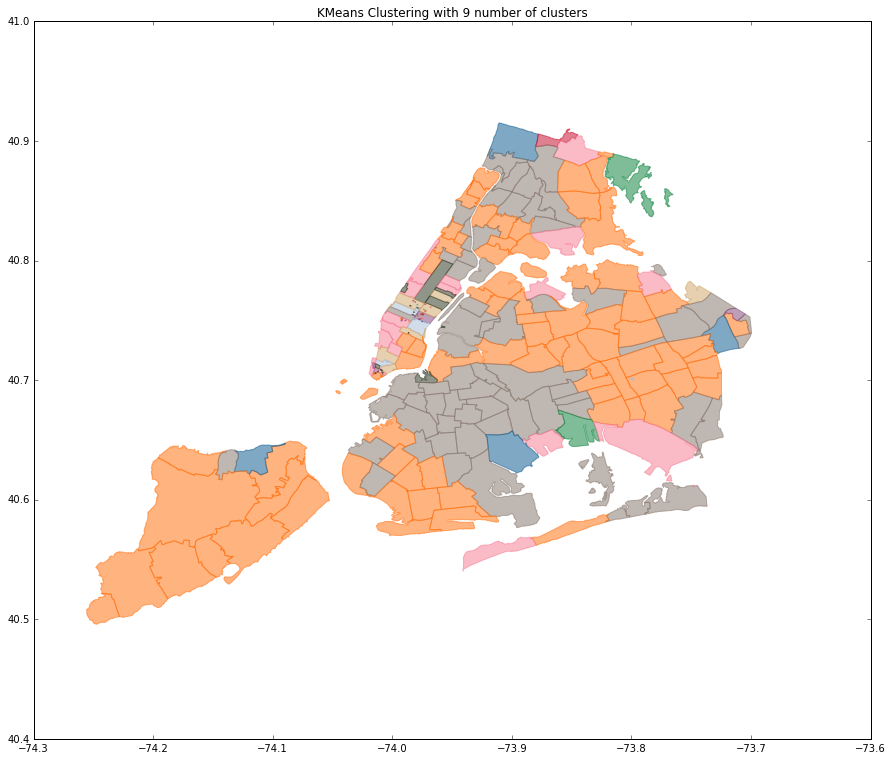

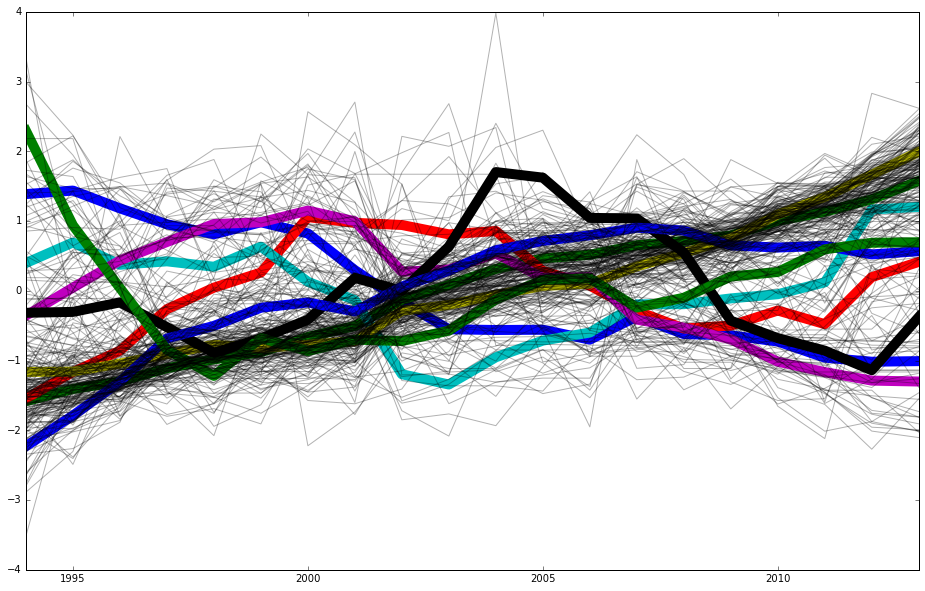

In [20]:

silhouette_scores = {}
for n_c in range(2,10):
    #Clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=n_c)
    kmeans.fit(wb2.values)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    #Silhouette score
    
    silhouette_avg = silhouette_score(wb2.values, kmeans.labels_)
    silhouette_scores[n_c] = silhouette_avg
    
    #Plotting 
    cluster = labels
    clustered_zips = pd.DataFrame({'zip':wb2.index, 'cluster':cluster})
    fig = plt.figure(figsize=(15,15)) 
    for i in nyjason['features']:
        poly = i['geometry']
        postcode = int(i['properties']['postalCode'])
        ax = fig.gca()
        GREEN = kelly_colors_hex[19]
        if postcode in list(wb2.index):
            color = kelly_colors_hex[int(clustered_zips[clustered_zips['zip']==postcode]['cluster'])+1]
            ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
        else:
            ax.add_patch(PolygonPatch(poly, fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))
    ax.axis('scaled')
    import matplotlib.patches as mpatches

    ground = mpatches.Patch(color=GREEN, alpha=0.5, label='Ground')
    plt.legend()
    plt.title('KMeans Clustering with %s number of clusters'%(n_c))
    plt.figure(figsize=(16,10))
    plt.xlim(1994,2013)
    for i in range(len(centers)):
        plt.plot(range(1994,2014),centers[i],linewidth=10) 
    for i in range(len(wb2)):
        plt.plot(wb2.iloc[i].index, wb2.iloc[i],'k',alpha=0.3)

In [22]:
for sc in silhouette_scores:
    print('For {0} number of centerters  silhouette value={1}'.format(sc, silhouette_scores[sc]))

For 2 number of centerters  silhouette value=0.561611135742
For 3 number of centerters  silhouette value=0.533249963188
For 4 number of centerters  silhouette value=0.42388512067
For 5 number of centerters  silhouette value=0.300393889803
For 6 number of centerters  silhouette value=0.215674603168
For 7 number of centerters  silhouette value=0.206932993096
For 8 number of centerters  silhouette value=0.16663965599
For 9 number of centerters  silhouette value=0.15164482446


# Using DBSCAN(Density-based spatial clustering of applications with noise) technique

[-1  0  1  2]
Silhouette Coefficient: 0.415072077399
Estimated number of clusters: 3


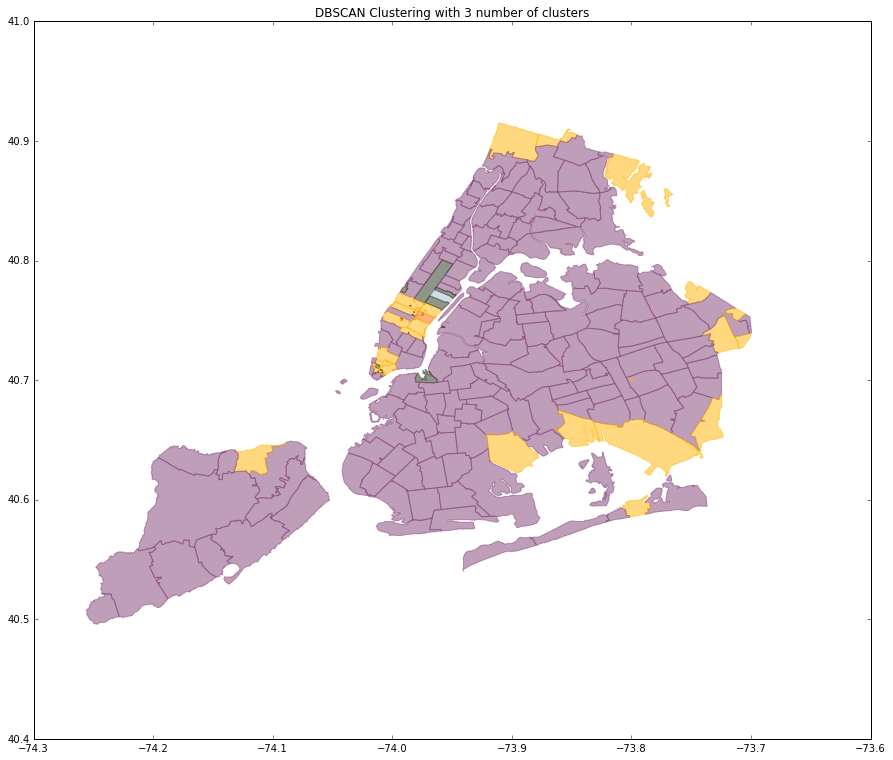

In [30]:
db = DBSCAN(eps=2).fit(wb2.values) ## MAXIMUM DISTANCE BETWEEN TWO POINT TO BE CONSIDERED IN THE SAME NEIGHBOURHOOD.

labels = (db.labels_).astype(int)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(unique(labels))
print("Silhouette Coefficient: %s" % silhouette_score(wb2.values, labels))
print('Estimated number of clusters: %d' % n_clusters)

cluster = labels
clustered_zips = pd.DataFrame({'zip':wb2.index, 'cluster':cluster})
fig = plt.figure(figsize=(15,15)) 
for i in nyjason['features']:
    poly = i['geometry']
    postcode = int(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(wb2.index):
        color = kelly_colors_hex[int(clustered_zips[clustered_zips['zip']==postcode]['cluster'])+1]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color=GREEN, alpha=0.5, label='Ground')
plt.legend()
plt.title('DBSCAN Clustering with %s number of clusters'%(n_clusters))

# Comparison of Result : 
The DBSCAN clustering for 3 number of clusters is giving more area in New York in the cluster areas as compared to K mean clustering algorithm for 3 clusters. Staten Island and more areas of Queens are covered under clusters in DBSCAN as compared to K mean clustering 